In [1]:
# Importing Libraries 
import pandas as pd
import numpy as np
import os

In [2]:
path = r'/Users/sarahedens/Desktop/Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_merged_derived.pkl'))

# 2. Find aggregated mean for entire dataframe

In [4]:
# Creating a subset of called df of the first 1 million entries
df = ords_prods_merge[:1000000]

In [5]:
df.shape

(1000000, 18)

In [6]:
df.head(10)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Average orders
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,both,Mid-range product,Busiest day,Busiest days,Average orders
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,10,0,both,Mid-range product,Regularly busy,Slowest days,Most orders
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,both,Mid-range product,Least busy,Slowest days,Average orders
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,both,Mid-range product,Regularly busy,Busiest days,Average orders
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,30.0,1,0,both,Mid-range product,Regularly busy,Slowest days,Most orders
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,19.0,1,0,both,Mid-range product,Regularly busy,Busiest days,Average orders
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,15,1,12,15.0,2,1,both,Mid-range product,Regularly busy,Busiest days,Most orders


In [7]:
df.groupby('department_id').agg({'order_number':['mean']})

,order_number
,mean
department_id,
1,15.577493
2,17.320781
3,16.084944
4,17.530458
5,14.763075
6,16.658449
7,17.031590
8,15.076662


In [8]:
#Checking dataframe 
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Average orders
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,both,Mid-range product,Busiest day,Busiest days,Average orders
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,10,0,both,Mid-range product,Regularly busy,Slowest days,Most orders
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,both,Mid-range product,Least busy,Slowest days,Average orders


In [9]:
# perform single aggregation mean of order number by department_id (average number of orders per user department id)
ords_prods_merge.groupby('department_id').agg({'order_number':['mean']})

,order_number
,mean
department_id,
1,15.457838
2,17.277920
3,17.170395
4,17.811403
5,15.215751
6,16.439806
7,17.225802
8,15.340650


# 3. Analyze results - subset vs entire dataframe


The average values within each department subset slightly deviate from the overall mean of the entire dataset, indicating that the subset values for each department are either higher or lower than the overall dataset average.

# 4. Creating a lotalty flag for existing customers

In [10]:
# Creating new column "max_order"
ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)

/var/folders/zn/5_w_pldx4xx695bgyc2zgrrh0000gn/T/ipykernel_43066/2324063168.py:2: FutureWarning: The provided callable <function amax at 0x1046351c0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)


In [11]:
# Checking for new column
ords_prods_merge.head(20)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,Mid-range product,Regularly busy,Regularly busy,Average orders,32
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,both,Mid-range product,Busiest day,Busiest days,Average orders,5
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,10,0,both,Mid-range product,Regularly busy,Slowest days,Most orders,3
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,both,Mid-range product,Least busy,Slowest days,Average orders,3
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,both,Mid-range product,Regularly busy,Busiest days,Average orders,26
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,9
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,30.0,1,0,both,Mid-range product,Regularly busy,Slowest days,Most orders,12
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,19.0,1,0,both,Mid-range product,Regularly busy,Busiest days,Average orders,20
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,15,1,12,15.0,2,1,both,Mid-range product,Regularly busy,Busiest days,Most orders,20


In [12]:
# Assign loyalty flag
ords_prods_merge.loc[ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

/var/folders/zn/5_w_pldx4xx695bgyc2zgrrh0000gn/T/ipykernel_43066/2765000783.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Loyal customer' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_merge.loc[ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'


In [13]:
ords_prods_merge.loc[(ords_prods_merge['max_order'] <= 40) & (ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [14]:
ords_prods_merge.loc[ords_prods_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [15]:
ords_prods_merge['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [16]:
# Check Loyalty flag in dataframe
ords_prods_merge[['user_id', 'loyalty_flag', 'order_number']].head(20)

,user_id,loyalty_flag,order_number
0,138,Regular customer,28
1,138,Regular customer,30
2,709,New customer,2
3,764,New customer,1
4,764,New customer,3
5,777,Regular customer,16
6,825,New customer,3
7,910,Regular customer,12
8,1052,Regular customer,10
9,1052,Regular customer,15


# 5. Cusotmers spending habits comparison

In [17]:
# the min max and mean of each loyalty flag
ords_prods_merge.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
loyalty_flag                             
Loyal customer    10.386336  1.0  99999.0
New customer      13.294670  1.0  99999.0
Regular customer  12.495717  1.0  99999.0

The data presented in the table indicates that, on average, loyal customers spend $10.39 per purchase, which is less than what new and regular customers spend. However, it's worth noting that there is a broad range of individual transaction values within each customer segment, as illustrated by the minimum and maximum prices. It's important to understand that relying solely on the average may not provide a complete understanding, as segments with higher averages could still exhibit significant variability in spending patterns.

# 6. Create flag on price mean of spender

In [18]:
# Creating column for average spender
ords_prods_merge['average_spend'] = ords_prods_merge.groupby(['user_id'])['prices'].transform(np.mean)

/var/folders/zn/5_w_pldx4xx695bgyc2zgrrh0000gn/T/ipykernel_43066/2579547553.py:2: FutureWarning: The provided callable <function mean at 0x104635ee0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ords_prods_merge['average_spend'] = ords_prods_merge.groupby(['user_id'])['prices'].transform(np.mean)


In [19]:
# Checking the new column
ords_prods_merge.head(20)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,5,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,1,both,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,20,0,both,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,10,0,both,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,11,1,both,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,7,0,both,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular customer,6.935398
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,2,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.957576
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,1,0,both,Mid-range product,Regularly busy,Slowest days,Most orders,12,Regular customer,6.680000
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,1,0,both,Mid-range product,Regularly busy,Busiest days,Average orders,20,Regular customer,7.162500
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,15,1,12,...,2,1,both,Mid-range product,Regularly busy,Busiest days,Most orders,20,Regular customer,7.162500


In [20]:
# Assign spending flag
ords_prods_merge.loc[ords_prods_merge['average_spend']<10,'spender_flag']='Low_spender'

/var/folders/zn/5_w_pldx4xx695bgyc2zgrrh0000gn/T/ipykernel_43066/3117420318.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low_spender' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_merge.loc[ords_prods_merge['average_spend']<10,'spender_flag']='Low_spender'


In [21]:
ords_prods_merge.loc[ords_prods_merge['average_spend']>= 10, 'spender_flag'] = 'High_spender'

In [22]:
# Check spender flags
ords_prods_merge['spender_flag'].value_counts(dropna = False)

spender_flag
Low_spender     31770614
High_spender      634245
Name: count, dtype: int64

In [23]:
ords_prods_merge[['user_id', 'average_spend', 'spender_flag', 'prices']].head(60)

,user_id,average_spend,spender_flag,prices
0,138,6.935811,Low_spender,5.8
1,138,6.935811,Low_spender,5.8
2,709,7.930208,Low_spender,5.8
3,764,4.972414,Low_spender,5.8
4,764,4.972414,Low_spender,5.8
5,777,6.935398,Low_spender,5.8
6,825,5.957576,Low_spender,5.8
7,910,6.680000,Low_spender,5.8
8,1052,7.162500,Low_spender,5.8
9,1052,7.162500,Low_spender,5.8


# 7. Create a flag for frequent users

In [24]:
# Create a column for frequet users
ords_prods_merge['Customer_frequency'] = ords_prods_merge.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

/var/folders/zn/5_w_pldx4xx695bgyc2zgrrh0000gn/T/ipykernel_43066/3165240341.py:2: FutureWarning: The provided callable <function median at 0x10476c220> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  ords_prods_merge['Customer_frequency'] = ords_prods_merge.groupby(['user_id'])['days_since_prior_order'].transform(np.median)


In [25]:
# Cheaking for new column
ords_prods_merge.head(20)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,both,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,both,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low_spender,8.0
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,both,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low_spender,9.0
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,both,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low_spender,9.0
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,both,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,both,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.957576,Low_spender,20.0
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,both,Mid-range product,Regularly busy,Slowest days,Most orders,12,Regular customer,6.680000,Low_spender,6.0
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,both,Mid-range product,Regularly busy,Busiest days,Average orders,20,Regular customer,7.162500,Low_spender,10.0
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,15,1,12,...,both,Mid-range product,Regularly busy,Busiest days,Most orders,20,Regular customer,7.162500,Low_spender,10.0


In [26]:
# Creating flag on order frequency
ords_prods_merge.loc[ords_prods_merge['Customer_frequency'] > 20, 'frequency_flag'] = 'Non_frequent_customer'

/var/folders/zn/5_w_pldx4xx695bgyc2zgrrh0000gn/T/ipykernel_43066/1703326696.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Non_frequent_customer' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_merge.loc[ords_prods_merge['Customer_frequency'] > 20, 'frequency_flag'] = 'Non_frequent_customer'


In [27]:
ords_prods_merge.loc[(ords_prods_merge['Customer_frequency']>10) & (ords_prods_merge['Customer_frequency']<=20),
                     'frequency_flag'] = 'Regular customer'

In [28]:
ords_prods_merge.loc[ords_prods_merge['Customer_frequency'] <= 10, 'frequency_flag'] = 'Frequent Customer'

In [29]:
# Check frequency flags
ords_prods_merge['frequency_flag'].value_counts(dropna = False)

frequency_flag
Frequent Customer        21559853
Regular customer          7208564
Non_frequent_customer     3636437
NaN                             5
Name: count, dtype: int64

In [30]:
#Checking for columns
ords_prods_merge[['user_id', 'Customer_frequency', 'frequency_flag']].head(60)

,user_id,Customer_frequency,frequency_flag
0,138,8.0,Frequent Customer
1,138,8.0,Frequent Customer
2,709,8.0,Frequent Customer
3,764,9.0,Frequent Customer
4,764,9.0,Frequent Customer
5,777,11.0,Regular customer
6,825,20.0,Regular customer
7,910,6.0,Frequent Customer
8,1052,10.0,Frequent Customer
9,1052,10.0,Frequent Customer


In [31]:
# data integrity check - for histogram issues in 4.9
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [32]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [33]:
ords_prods_merge['prices'].mean()

11.980225638383468

In [34]:
ords_prods_merge['prices'].median()

7.4

In [35]:
ords_prods_merge['prices'].max()

99999.0

The presence of extreme values (99999.0) in the dataset causes the histogram to merge all the smaller values, which include both the mean and the median, into a single bar.

/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sarahedens/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

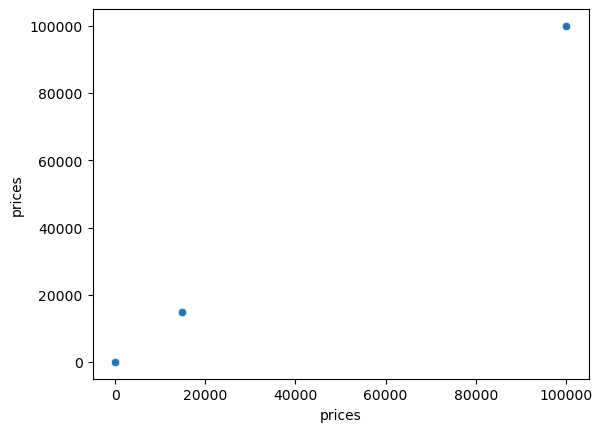

In [36]:
# Create scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [37]:
# Run exploratory checks on df_all
# Set a threshold - anything above the 'normal' prive of a supermarket item
ords_prods_merge.loc[ords_prods_merge['prices']>100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,Customer_frequency,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High_spender,5.0,Frequent Customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High_spender,5.0,Frequent Customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High_spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High_spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High_spender,23.0,Non_frequent_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High_spender,4.0,Frequent Customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High_spender,4.0,Frequent Customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High_spender,5.0,Frequent Customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High_spender,12.0,Regular customer


-Assumption: The value 14900.0 corresponds to the second point on the scatterplot, while the value 99999.0 corresponds to the third point.

-Solution: Considering that these values deviate significantly from the other values in the column, it's reasonable to treat them as missing data points.

In [38]:
# return odd values into NaN
ords_prods_merge.loc[ords_prods_merge['prices']>100, 'prices'] = np.nan

In [39]:
ords_prods_merge['prices'].max()

25.0

# 9. Export data as pkl

In [40]:
ords_prods_merge.to_pickle(os.path.join(path,'02 Data','Prepared Data', 'ords_prods_grouped.pkl'))